
=== Protein Binding Site Center (Approx) ===
[32.245243  6.723796 59.119514]


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


=== Docking Results ===
       Ligand  Docking_Score
0    Ligand_1          -9.00
1    Ligand_2          -4.39
2    Ligand_3          -6.14
3    Ligand_4          -7.21
4    Ligand_5         -10.75
5    Ligand_6         -10.75
6    Ligand_7         -11.54
7    Ligand_8          -5.07
8    Ligand_9          -7.19
9   Ligand_10          -6.34
10  Ligand_11         -11.84
11  Ligand_12          -4.24
12  Ligand_13          -5.34
13  Ligand_14         -10.30
14  Ligand_15         -10.55
15  Ligand_16         -10.53
16  Ligand_17          -9.57
17  Ligand_18          -7.80
18  Ligand_19          -8.54
19  Ligand_20          -9.67 



/tmp/ipykernel_224961/1431818543.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ligand", y="Docking_Score", data=docking_df, palette="viridis")


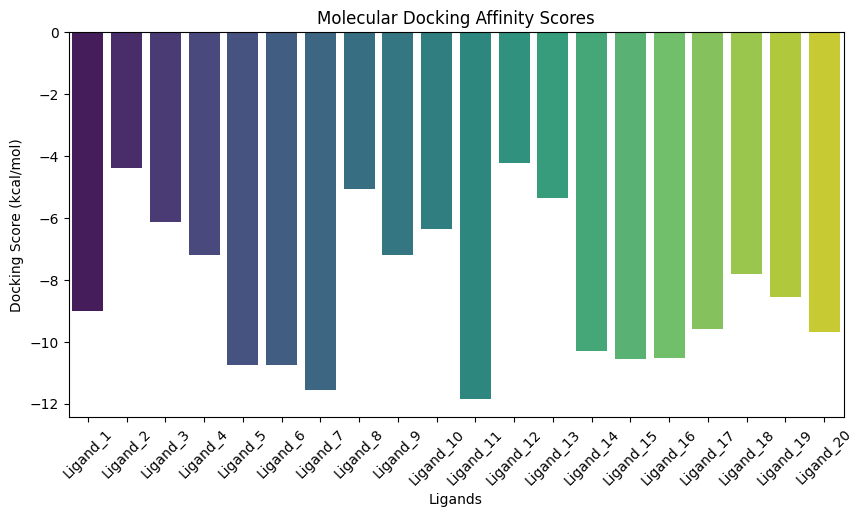

=== Best Candidate Ligand ===
Ligand           Ligand_11
Docking_Score       -11.84
Name: 10, dtype: object 

=== Genomic ML Results ===
Accuracy: 0.433
              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30



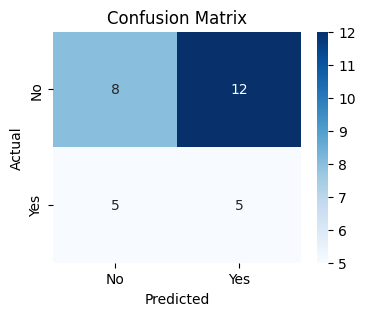


--- 🧾 Conclusion ---
Best Ligand: Ligand_11  (-11.84 kcal/mol)
Random Forest Accuracy: 43.33%


In [6]:
# ==============================================
# 🧩 Import Required Libraries
# ==============================================
from Bio.PDB import PDBParser
from math import sqrt
import py3Dmol
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fix random seed for reproducibility
np.random.seed(42)

# ==============================================
# 🔹 Step 1: Protein Structure Visualization
# ==============================================

pdb_id = "5IKR"
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"

print(f"Downloading protein {pdb_id} from RCSB...")
pdb_text = requests.get(url).text

# Save PDB file
with open(f"{pdb_id}.pdb", "w") as f:
    f.write(pdb_text)

# Parse PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("COX2", f"{pdb_id}.pdb")

# Calculate approximate protein binding site center (Chain A)
coords = []
for atom in structure.get_atoms():
    if atom.get_parent().get_parent().id == "A":
        if atom.element in ("C", "O", "N", "S"):
            coords.append(atom.coord)

protein_center = np.mean(coords, axis=0)
print("\n=== Protein Binding Site Center (Approx) ===")
print(protein_center)

# 3D Visualization using py3Dmol
viewer = py3Dmol.view(query=f'pdb:{pdb_id}', width=700, height=500)
viewer.setStyle({'cartoon': {'color': 'spectrum'}})

# Highlight binding site
cx, cy, cz = protein_center
viewer.addSphere({
    'center': {'x': float(cx), 'y': float(cy), 'z': float(cz)},
    'radius': 2.0,
    'color': 'red',
    'opacity': 0.8
})
viewer.zoomTo()
viewer.show()

# ==============================================
# 🔹 Step 2: Molecular Docking Simulation
# ==============================================

# Simulate docking results
ligands = [f"Ligand_{i}" for i in range(1, 21)]
scores = np.round(np.random.uniform(-12, -4, 20), 2)
docking_df = pd.DataFrame({"Ligand": ligands, "Docking_Score": scores})

print("\n=== Docking Results ===")
print(docking_df, "\n")

# Plot docking affinity scores
plt.figure(figsize=(10, 5))
sns.barplot(x="Ligand", y="Docking_Score", data=docking_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Molecular Docking Affinity Scores")
plt.xlabel("Ligands")
plt.ylabel("Docking Score (kcal/mol)")
plt.show()

# Identify best ligand (lowest docking score)
best = docking_df.loc[docking_df["Docking_Score"].idxmin()]
print("=== Best Candidate Ligand ===")
print(best, "\n")

# ==============================================
# 🔹 Step 3: Genomic Machine Learning Simulation
# ==============================================

# Generate random genomic data
X, y = np.random.randint(0, 2, (100, 10)), np.random.randint(0, 2, 100)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
acc = accuracy_score(y_test, y_pred)

print("=== Genomic ML Results ===")
print("Accuracy:", round(acc, 3))
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================================
# 🔹 Step 4: Final Conclusion
# ==============================================
print("\n--- 🧾 Conclusion ---")
print(f"Best Ligand: {best['Ligand']}  ({best['Docking_Score']} kcal/mol)")
print(f"Random Forest Accuracy: {acc*100:.2f}%")
